# Geographics vs. Projected CRS

In [50]:
%reset -sf
#from pandas import read_csv
import pandas as pd
import geopandas #as gpd

# Read the Gauss-Kr&uuml;ger coordinates from a csv file

In [ ]:
# MGI 1901 / Balkans zone 6 EPSG:8678
coord_fn = 'GeoMaks2022-coords.csv'
gkp_pd = pd.read_csv(coord_fn, skipinitialspace=True)
print(gkp_pd)

          GKN         GKE
0  4935589.07  6598142.48
1  4935574.86  6598135.76
2  4935581.15  6598185.93
3  4935586.20  6598224.33
4  4935605.44  6598367.04
5  4935617.30  6598365.38
6  4935618.52  6598365.21
7  4935596.11  6598195.02


# Read the latitude and longitude Data of ZB2
[UTM Zone](https://mangomap.com/robertyoung/maps/69585/what-utm-zone-am-i-in-#)

In [52]:
# zlatiborska 2 loznica: 44.561365, 19.211011
zb2_fn = 'Zlatiborska_2.csv'
zb2_pd = pd.read_csv(zb2_fn, skipinitialspace=True)
print(zb2_pd)

   corner        lat        lon
0       1  44.558288  19.230437
1       2  44.558295  19.230612
2       3  44.558200  19.230443
3       4  44.558207  19.230618


# Create GeoPandas GeoDataFrame from Pandas Dataframe

   corner        lat        lon                   geometry
0       1  44.558288  19.230437  POINT (44.55829 19.23044)
1       2  44.558295  19.230612  POINT (44.55830 19.23061)
2       3  44.558200  19.230443  POINT (44.55820 19.23044)
3       4  44.558207  19.230618  POINT (44.55821 19.23062)
None


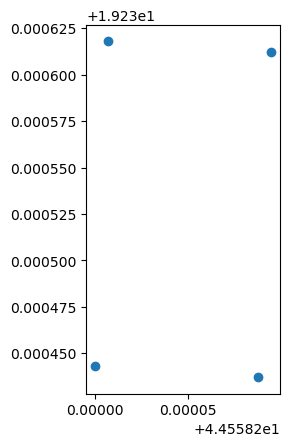

In [53]:
zb2_gdf = geopandas.GeoDataFrame(
    zb2_pd, geometry=geopandas.points_from_xy(zb2_pd.lat, zb2_pd.lon))
#    zb2_pd, geometry=geopandas.points_from_xy(zb2_pd.lon, zb2_pd.lat))
zb2_gdf.plot()
print(zb2_gdf)
print(zb2_gdf.crs)

## Set to Geographic 2D CRS: EPSG:4326, WGS 84

In [54]:

zb2_gdf.crs = "EPSG:4326" 
print(zb2_gdf.geometry.x)
print(zb2_gdf.geometry.y)
zb2_gdf.crs

0    44.558288
1    44.558295
2    44.558200
3    44.558207
dtype: float64
0    19.230437
1    19.230612
2    19.230443
3    19.230618
dtype: float64


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Projected CRS: EPSG:8678,  MGI 1901 / Balkans zone 6

In [63]:
gkp = zb2_gdf.to_crs(epsg='8678') 
print(gkp.geometry.x)
print(gkp.geometry.y)
print(gkp)
gkp.crs

0    9.373922e+06
1    9.373920e+06
2    9.373912e+06
3    9.373909e+06
dtype: float64
0    2.357641e+06
1    2.357662e+06
2    2.357640e+06
3    2.357661e+06
dtype: float64
   corner        lat        lon                         geometry
0       1  44.558288  19.230437  POINT (9373922.287 2357641.168)
1       2  44.558295  19.230612  POINT (9373919.611 2357662.395)
2       3  44.558200  19.230443  POINT (9373912.091 2357640.230)
3       4  44.558207  19.230618  POINT (9373909.415 2357661.458)


<Projected CRS: EPSG:8678>
Name: MGI 1901 / Balkans zone 6
Axis Info [cartesian]:
- Y[east]: Easting (metre)
- X[north]: Northing (metre)
Area of Use:
- name: Europe - former Yugoslavia onshore 16.5°E to 19.5°E
- bounds: (16.5, 41.79, 19.51, 46.55)
Coordinate Operation:
- name: Balkans zone 6
- method: Transverse Mercator
Datum: MGI 1901
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

# Obtain the ESRI WKT
[ESRI WKT](https://epsg.io) for EPSG 8678area

In [56]:
ESRI_WKT = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]'

# Save the file as an ESRI Shapefile

In [57]:
#from shapely.geometry import Point
#zb2_gdf = geopandas.GeoDataFrame(zb2_gdf.to_dict(), crs=8678)
#zb2_gdf.crs  
#print(zb2_gdf)
#zb2_epsg = zb2_gdf.to_crs(3857)
#print(ESRI_WKT)
zb2_gdf.to_file(filename = 'zb2.shp', driver = 'ESRI Shapefile') #, crs_wkt = ESRI_WKT)